Enter your username (used for marking):

In [1]:
username = 'acd19hc'

# COM4509/6509 Coursework Part 2

Hello,
This is the *second* of the two parts. Each part accounts for 50\% of the overall coursework mark and this part has a total of 50 marks available.
Attempt as much of this as you can, each of the questions are self-contained and contain some easier and harder bits so even if you can't complete Q1 straight away then you may still be able to progress with the other questions.

### Overview
This part of the assignment will cover:
- Logistic regression and PCA: 13 Marks, lecture 6 and 8. 
- Neural networks: 16 Marks, lecture 7 and 8.
- Auto-encoders: 16 Marks, lecture 8 and 9.

### What to submit

- You need to submit **two jupyter notebooks** (not zipped together) and a **pdf** copy of part 2, named:

```
assignment_part1_[username].ipynb
assignment_part2_[username].ipynb
assignment_part2_[username].pdf
```

replacing `[username]` with your username, e.g. `abc18de`.
- **Please execute the cells before your submission**. The **pdf** copy will be used as a backup in case the data gets corrupted and since we cannot run all the notebooks during marking. The best way to get a pdf is using Jupyter Notebook locally but if you are using Google Colab and are unable to download it to use Jupyter then you can use the Google Colab *file $\rightarrow$ print* to get a pdf copy.
- **Please do not upload** the data files used in this Notebook. We just want the two python notebooks *and the pdf*.

### Assessment Criteria 

- The marks are indicated for each part: You'll get marks for correct code that does what is asked and gets the right answer. **These contribute 45**. You should make sure any figures are plotted properly with axis labels and figure legends.
- There are also **5 marks for "Code quality"** (includes both readability and efficiency).

### Late submissions

We follow the department's guidelines about late submissions, Undergraduate [handbook link](https://sites.google.com/sheffield.ac.uk/comughandbook/your-study/assessment/late-submission). PGT [handbook link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/home/your-study/assessment/late-submission).

### Use of unfair means

This is an individual assignment, while you may discuss this with your classmates, please make sure you submit your own code. You are allowed to use code from the labs as a basis of your submission.

"Any form of unfair means is treated as a serious academic offence and action may be taken under the Discipline Regulations." (from the students Handbook).



### Reproducibility and readibility
Whenever there is randomness in the computation, you MUST set a random seed for reproducibility. Use your UCard number XXXXXXXXX (or the digits in your registration number if you do not have one) as the random seed throughout this assignment. You can set the seeds using torch.manual_seed(XXXXX) and np.random.seed(XXXXX).
Answers for each question should be clearly indicated in your notebook. While code segments are indicated for answers, you may use more cells as necessary.  All code should be clearly documented and explained.
Note: You will make several design choices (e.g. hyperparameters) in this assignment. There are no “standard answers”. You are encouraged to explore several design choices to settle down with good/best ones, if time permits.



## Question 1: Logistic regression and PCA [13 marks]

MedMNIST is a collection of healthcase based datasets that are pre-processed to match to format of the original MNIST dataset. In this questions, you will perform logistic regression and dimension reduction using PCA on the **PneumoniaMNIST** dataset from the MedMNIST. The task for this dataset is to detect whether a chest X-ray shows signs of Pneumonia or not and is therefore a binary classification task.


### 1.1: Data download [1 mark]

The code cell belows provides the code to download the dataset as a compressed numpy file directly from the [MedMNIST website](https://doi.org/10.5281/zenodo.6496656
). If you prefer, you can follow the instructions at https://github.com/MedMNIST/MedMNIST to download and load the data.



In [2]:
import numpy as np
import urllib.request
import os

# Download the dataset to the local folder
urllib.request.urlretrieve('https://zenodo.org/record/6496656/files/pneumoniamnist.npz?download=1', 'pneumoniamnist.npz')

# Load the compressed numpy array file
dataset = np.load('./pneumoniamnist.npz')
epochs=20
# The loaded dataset contains each array internally
for key in dataset.keys():
    print(key, dataset[key].shape, dataset[key].dtype)

train_images (4708, 28, 28) uint8
val_images (524, 28, 28) uint8
test_images (624, 28, 28) uint8
train_labels (4708, 1) uint8
val_labels (524, 1) uint8
test_labels (624, 1) uint8


**1.1a** After downloading the data, merge the validation set into the training set and reshape the images so that each is a 1D array. Then scale the pixel values so they are in the range [0,1].

In [3]:
# Write your code here.
train=np.concatenate((dataset['train_images'],dataset['val_images']),axis=0)
train_labels=np.concatenate((dataset['train_labels'],dataset['val_labels']),axis=0)
test=dataset['test_images']
#reshape images so that each is a 1D array
train=train.reshape(train.shape[0],train.shape[1]*train.shape[2])

#reshape test images so that each is a 1D array
test=dataset['test_images'].reshape(dataset['test_images'].shape[0],dataset['test_images'].shape[1]*dataset['test_images'].shape[2])
train=train/255


### 1.2: Dimensional reduction and training [6 marks]

**1.2a** Using the Scikit-learn PCA class, transform the training and test data into **at least seven** different sets of reduced dimensions, i.e create 7 alternate datsets with ($k_1, k_2, ..., k_7$) number of features. **Briefly explain** your choice reduced features. Keep a copy of the unreduced data so that in total you have **eight** datasets.


You should fit the tranformation based on the training data and use that to transform the test data. You can find details of the PCA transformation class [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [4]:
# Write your code here.
from sklearn.decomposition import PCA
#make copy of training data
train_copy=train.copy()
#split train into 7 parts
length=train.shape[0]//7
train1=train[:length]
train2=train[length:length*2]
train3=train[length*2:length*3]
train4=train[length*3:length*4]
train5=train[length*4:length*5]
train6=train[length*5:length*6]
train7=train[length*6:]
train1_labels=train_labels[:length]
train2_labels=train_labels[length:length*2]
train3_labels=train_labels[length*2:length*3]
train4_labels=train_labels[length*3:length*4]
train5_labels=train_labels[length*4:length*5]
train6_labels=train_labels[length*5:length*6]
train7_labels=train_labels[length*6:]

#print number of components for pca
pca1=PCA(n_components=0.95)
pca2=PCA(n_components=0.9)
pca3=PCA(n_components=0.85)
pca4=PCA(n_components=0.8)
pca5=PCA(n_components=0.75)
pca6=PCA(n_components=10)
pca7=PCA(n_components=5)

pca1.fit(train1)
pca2.fit(train2)
pca3.fit(train3)
pca4.fit(train4)
pca5.fit(train5)
pca6.fit(train6)
pca7.fit(train7)
#transform each part of train data
train1=pca1.transform(train1)
train2=pca2.transform(train2)
train3=pca3.transform(train3)
train4=pca4.transform(train4)
train5=pca5.transform(train5)
train6=pca6.transform(train6)


**1.2b** Train **eight** logistic regression classifiers (LRC): one on the original features (unreduced), and seven on PCA features with seven different dimensions in 1.2a, i.e., LRC on $k_1$ PCA features; LRC on $k_2$ PCA features; ..., LRC on $k_7$ PCA features and LRC on the unreduced data. You will need to decide on any options for the logistic regression fitting and **explain** which choices you make.
You can use the Scikit Learn Logistic Regression classifier, further information is given [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).



In [5]:
# Write your code here.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
seed=42
model=LogisticRegression(solver='lbfgs',max_iter=1000,random_state=seed)
model1=model.fit(train1,train1_labels)
model2=model.fit(train2,train2_labels)
model3=model.fit(train3,train3_labels)
model4=model.fit(train4,train4_labels)
model5=model.fit(train5,train5_labels)
model6=model.fit(train6,train6_labels)
model7=model.fit(train7,train7_labels)
model8=model.fit(train_copy,train_labels)



#Random state is set to 42 for all models for consistency
#using lbfgs solver for reducing multinoomial loss
#max_iter is set to 1000 to avoid convergence warning


c:\Users\David\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\David\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\David\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\David\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

### 1.3: Model evaluation [6 marks]

**1.3b** For each of the trained classifiers in 1.2b, calculate the classification accuracy on the training data and the test data. Extract the total explained variance by summing the `PCA.explained_variance_ratio_` for each of your PCA transformations. **Plot** the training accuracy and test accuracy against the total explained variance at each $k_n$. You should include the results for the case trained on the original features, which corresponds to a total explained variance of 1.

In [6]:
# Write your code here.
from sklearn.metrics import accuracy_score
#calculate classification accuracy on train1
pred1=model1.predict(train)
acc1=accuracy_score(train_labels,pred1)
print('Accuracy on train1:',acc1)



Accuracy on train1: 0.9713302752293578


**1.3b** Describe at least **two** relevant observations from the evaluation results above.

In [7]:
# Write your answer here.

## Question 2: Convolutional neural networks for image recognition [16 marks]

Fashion-MNIST is a dataset of Zalando's article images. It consists of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes: 0=T-shirt/top; 1=Trouser; 2=Pullover; 3=Dress; 4=Coat; 5=Sandal; 6=Shirt; 7=Sneaker; 8=Bag; 9=Ankle boot.

It is available online at https://github.com/zalandoresearch/fashion-mnist but here we will use the version built into PyTorch as part of the TorchVision library [see here for  documentation](https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST).

In this question, you should PyTorch to train various forms of neural network models to classify these images. You can refer to Lab 7 on how to define and train neural networks with PyTorch. 

### 2.1: Data download and inspection [3 marks]

**2.1a** Use the PyTorch Torchvision API to load both the train and test parts of the Fashion-MNIST dataset. You can use the code used in Lab 7 to load the CIFAR10 as a basis for this.

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
#load fashion mnist dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
#train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
#test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())


**2.1b** Use the `torch.utils.data.random_split` function to split the 60,000 training set into 2 subsets: the first part will be used for training, the second part will be used for validation. You must choose a sensible split of this into the training and validation sets. Create a DataLoader for each of the train, validation, and test splits.

In [9]:
# Write your code here.
#split dataset into a 9:1 ratio for training and validation
train_size=int(0.9*len(train_dataset))
val_size=len(train_dataset)-train_size
train_dataset,val_dataset=torch.utils.data.random_split(train_dataset,[train_size,val_size])
batch_size=512
#load the training and validation dataset into dataloaders
train_loader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
val_loader=DataLoader(val_dataset,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=batch_size,shuffle=True)


**2.1c** Display 2 example images from each of the classes (20 images in total).

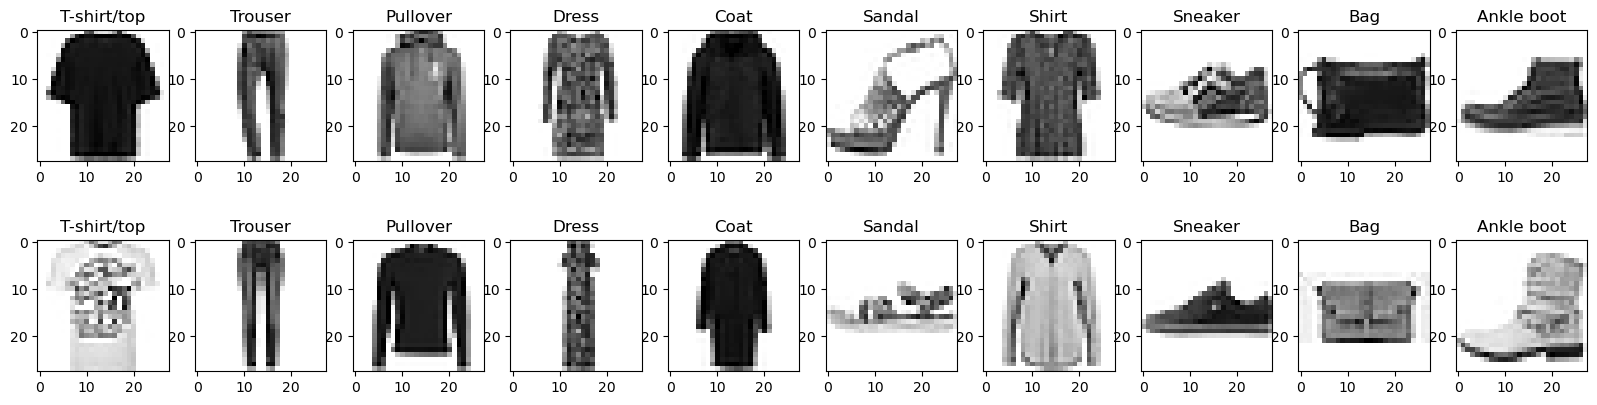

In [10]:
# Write your code here.
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')
fig,ax=plt.subplots(2,10,figsize=(20,5))#prepare a 2x10 grid for plotting
for i in range(10):
    index=0#initialize index to 0 for each class
    for data in train_loader:
        if index>1:#break if 2 images are plotted for each class
            break
        images,labels=data
        for j in range(len(labels)):
            if labels[j]==i:
                ax[index,i].imshow(images[j].numpy().squeeze(),cmap='gray_r')
                ax[index,i].set_title(classes[labels[j]])
                index+=1#one of the pictures for the class has been shown, so increment index
                if index>1:
                    break
        if index>1:
            break
    

### 2.2: Network training [8 marks]

In this section you will train a set of neural network models to classify the Fashion-MNIST data set. Only the number of convolutional (Conv) layers and the number of fully connected (FC) layers will be specified below. You are free to design other aspects of the network. For example, you can use other types of operation (e.g. padding), layers (e.g. pooling, or preprocessing (e.g. augmentation), and you choose the number of units/neurons in each layer. Likewise, you may choose the number of epochs and many other settings according to your accessible computational power. You should choose sensible values for the batch size and learning rate. If you wish, you may use alternate optimisers, such as [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html).

When training each model you should keep track of the following values:
1. Training accuracy
2. Validation accuracy
3. Test accuracy

Remember the accuracy is the number of correct classifications out of that portion of the dataset.

**2.2a** Train a neural network composed of **2 fully connected layers** with an activation function of your choice. Train the model on the training set, use the validation set to choose the best design among **at least three different** choices, and test the chosen model on the test set.

Remember that your dataloader will give you a 2D image. The CNNs can process these but your fully connected (`nn.Linear`) layers are expecting each sample to be a vector.


In [11]:
# Write your code here.
class model1(nn.Module):
    def __init__(self):
        super(model1,self).__init__()
        #create 2 fully connected layers
        self.fc1=nn.Linear(784,20) 
        self.fc2=nn.Linear(20,10)
    def forward(self,x):
        #flatten the input
        x=x.view(-1,784)
        #apply relu activation to the first layer
        x=F.relu(self.fc1(x))
        #apply softmax activation to the second layer
        x=F.softmax(self.fc2(x),dim=1)
        return x


class model2(nn.Module):
    def __init__(self):
        super(model2,self).__init__()
        self.fc1=nn.Linear(784,392)
        self.fc2=nn.Linear(392,10)
    def forward(self,x):
        #flatten the input
        x=x.view(-1,784)
        #apply sigmoid activation to the first layer
        x=F.sigmoid(self.fc1(x))
        #apply softmax activation to the second layer
        x=F.softmax(self.fc2(x),dim=1)
        return x



class model3(nn.Module):
    def __init__(self):
        super(model3,self).__init__()
        self.fc1=nn.Linear(784,128)
        self.fc2=nn.Linear(128,10)
    def forward(self,x):
        #apply batch normalization to the input
        x=F.batch_norm(x,running_mean=None,running_var=None,training=True)
        #flatten the input
        x=x.view(-1,784)
        #apply relu activation to the first layer
        x=F.relu(self.fc1(x))
        #apply softmax activation to the second layer
        x=F.softmax(self.fc2(x),dim=1)
        return x
traincorrect1=0
traincorrect2=0
traincorrect3=0
traincorrectList1=[]
traincorrectList2=[]
traincorrectList3=[]
valcorrectList1=[]
valcorrectList2=[]
valcorrectList3=[]
testcorrectList1=[]
testcorrectList2=[]
testcorrectList3=[]
testcorrect1=0
testcorrect2=0
testcorrect3=0
correct1=0
correct2=0
correct3=0
model1=model1()
model2=model2()
model3=model3()
criterion=nn.CrossEntropyLoss()
optimizer1=optim.Adam(model1.parameters(),lr=0.001)
optimizer2=optim.Adam(model2.parameters(),lr=0.001)
optimizer3=optim.Adam(model3.parameters(),lr=0.001)




for epoch in range(epochs):
    for data in train_loader:
        inputs,labels=data
        optimizer1.zero_grad()
        optimizer2.zero_grad()
        optimizer3.zero_grad()
        output1=model1(inputs)
        output2=model2(inputs)
        output3=model3(inputs)
        loss1=criterion(output1,labels)
        loss2=criterion(output2,labels)
        loss3=criterion(output3,labels)
        loss1.backward()
        loss2.backward()
        loss3.backward()
        optimizer1.step()
        optimizer2.step()
        optimizer3.step()
        _,pred1=torch.max(output1.data,1)
        _,pred2=torch.max(output2.data,1)
        _,pred3=torch.max(output3.data,1)
        traincorrect1+=(pred1==labels).sum().item()
        traincorrect2+=(pred2==labels).sum().item()
        traincorrect3+=(pred3==labels).sum().item()

    for data in val_loader:
        inputs,labels=data
        output1=model1(inputs)
        output2=model2(inputs)
        output3=model3(inputs)
        _,pred1=torch.max(output1.data,1)
        _,pred2=torch.max(output2.data,1)
        _,pred3=torch.max(output3.data,1)
        correct1+=(pred1==labels).sum().item()
        correct2+=(pred2==labels).sum().item()
        correct3+=(pred3==labels).sum().item()

    for data in test_loader:
        inputs,labels=data
        output1=model1(inputs)
        output2=model2(inputs)
        output3=model3(inputs)
        _,pred1=torch.max(output1.data,1)
        _,pred2=torch.max(output2.data,1)
        _,pred3=torch.max(output3.data,1)
        testcorrect1+=(pred1==labels).sum().item()
        testcorrect2+=(pred2==labels).sum().item()
        testcorrect3+=(pred3==labels).sum().item()
    print('Accuracy on validation set after epoch',epoch+1)
    print('Model 1:',correct1/len(val_dataset))
    print('Model 2:',correct2/len(val_dataset))
    print('Model 3:',correct3/len(val_dataset))

    print()
    # print('Accuracy on training set after epoch',epoch+1)
    # print('Model 1:',traincorrect1/len(train_dataset))
    # print('Model 2:',traincorrect2/len(train_dataset))
    # print('Model 3:',traincorrect3/len(train_dataset))
    # print()
    # print('Accuracy on test set after epoch',epoch+1)
    # print('Model 1:',testcorrect1/len(test_dataset))
    # print('Model 2:',testcorrect2/len(test_dataset))
    # print('Model 3:',testcorrect3/len(test_dataset))
    # print()
    traincorrectList1.append(traincorrect1/len(train_dataset))
    traincorrectList2.append(traincorrect2/len(train_dataset))
    traincorrectList3.append(traincorrect3/len(train_dataset))
    valcorrectList1.append(correct1/len(val_dataset))
    valcorrectList2.append(correct2/len(val_dataset))
    valcorrectList3.append(correct3/len(val_dataset))
    testcorrectList1.append(testcorrect1/len(test_dataset))
    testcorrectList2.append(testcorrect2/len(test_dataset))
    testcorrectList3.append(testcorrect3/len(test_dataset))
    correct1=0
    correct2=0
    correct3=0
    traincorrect1=0
    traincorrect2=0
    traincorrect3=0
    testcorrect1=0
    testcorrect2=0
    testcorrect3=0


#test model 3 on the test set
for data in test_loader:
    inputs,labels=data
    output3=model3(inputs)
    _,pred3=torch.max(output3.data,1)
    correct3+=(pred3==labels).sum().item()
print('Accuracy on test set:',correct3/len(test_dataset))
#model 2 has higher accuracy with lower batch size however the
# time to train on the lower batch size for model 2 is too high



c:\Users\David\anaconda3\lib\site-packages\torch\nn\functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Accuracy on validation set after epoch 1
Model 1: 0.6538333333333334
Model 2: 0.7173333333333334
Model 3: 0.8193333333333334

Accuracy on validation set after epoch 2
Model 1: 0.709
Model 2: 0.73
Model 3: 0.841

Accuracy on validation set after epoch 3
Model 1: 0.7268333333333333
Model 2: 0.7383333333333333
Model 3: 0.8535

Accuracy on validation set after epoch 4
Model 1: 0.732
Model 2: 0.7411666666666666
Model 3: 0.8536666666666667

Accuracy on validation set after epoch 5
Model 1: 0.7358333333333333
Model 2: 0.7433333333333333
Model 3: 0.861

Accuracy on validation set after epoch 6
Model 1: 0.7378333333333333
Model 2: 0.7451666666666666
Model 3: 0.8573333333333333

Accuracy on validation set after epoch 7
Model 1: 0.7381666666666666
Model 2: 0.7448333333333333
Model 3: 0.8646666666666667

Accuracy on validation set after epoch 8
Model 1: 0.7421666666666666
Model 2: 0.7455
Model 3: 0.8658333333333333

Accuracy on validation set after epoch 9
Model 1: 0.7436666666666667
Model 2: 0.74

**2.2b** Define and train using a neural network composed of **2 convolutional layers and 2 fully connected layers**. Train the model on the training set, use the validation set to choose the best design among **at least three different** choices, and test the chosen model on the test set.

In [12]:
# Write your code here.
#create a neural network with 2 convolutional layers and 2 fully connected layers
class model4(nn.Module):
    def __init__(self):
        super(model4, self).__init__()
        self.conv1=nn.Conv2d(1,2,5)
        self.pool=nn.MaxPool2d(2,2)
        self.conv2=nn.Conv2d(2,4,5)
        self.fc1=nn.Linear(4*4*4,10)
        self.fc2=nn.Linear(10,10)
    def forward(self,x):
        
        x = self.pool(F.relu(self.conv1(x)))
 
        x = self.pool(F.relu(self.conv2(x)))

        x = x.view(-1, 4*4*4)
        x= F.relu(self.fc1(x))
        x=self.fc2(x)
        return x
class model5(nn.Module):
    def __init__(self):
        super(model5, self).__init__()
        self.conv1=nn.Conv2d(1,2,5)
        self.pool=nn.MaxPool2d(2,2)
        self.conv2=nn.Conv2d(2,4,5)
        self.fc1=nn.Linear(4*4*4,100)
        self.fc2=nn.Linear(100,10)
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 4*4*4)
        x= F.relu(self.fc1(x))
        x=self.fc2(x)
        return x
class model6(nn.Module):
    def __init__(self):
        super(model6, self).__init__()
        self.conv1=nn.Conv2d(1,2,5)
        self.pool=nn.MaxPool2d(2,2)
        self.conv2=nn.Conv2d(2,4,5)
        self.fc1=nn.Linear(4*4*4,256)
        self.fc2=nn.Linear(256,10)
    def forward(self,x):
        x = self.pool(F.tanh(self.conv1(x)))
        x = self.pool(F.tanh(self.conv2(x)))
        x = x.view(-1, 4*4*4)
        x= F.tanh(self.fc1(x))
        x=self.fc2(x)
        return x
correct4=0
correct5=0
correct6=0
traincorrect4=0
traincorrect5=0
traincorrect6=0
testcorrect4=0
testcorrect5=0
testcorrect6=0
traincorrectList4=[]
traincorrectList5=[]
traincorrectList6=[]
valcorrectList4=[]
valcorrectList5=[]
valcorrectList6=[]
testcorrectList4=[]
testcorrectList5=[]
testcorrectList6=[]




model4=model4()
model5=model5()
model6=model6()
criterion=nn.CrossEntropyLoss()
optimizer4=optim.Adam(model4.parameters(),lr=0.001)
optimizer5=optim.Adam(model5.parameters(),lr=0.001)
optimizer6=optim.Adam(model6.parameters(),lr=0.001)

for epoch in range(epochs):
    for data in train_loader:
        inputs,labels=data
        optimizer4.zero_grad()
        optimizer5.zero_grad()
        optimizer6.zero_grad()
        output1=model4(inputs)
        output2=model5(inputs)
        output3=model6(inputs)
        loss1=criterion(output1,labels)
        loss2=criterion(output2,labels)
        loss3=criterion(output3,labels)
        loss1.backward()
        loss2.backward()
        loss3.backward()
        optimizer4.step()
        optimizer5.step()
        optimizer6.step()
        _,pred1=torch.max(output1.data,1)
        _,pred2=torch.max(output2.data,1)
        _,pred3=torch.max(output3.data,1)
        traincorrect4+=(pred1==labels).sum().item()
        traincorrect5+=(pred2==labels).sum().item()
        traincorrect6+=(pred3==labels).sum().item()

    for data in val_loader:
        inputs,labels=data
        output1=model4(inputs)
        output2=model5(inputs)
        output3=model6(inputs)
        _,pred1=torch.max(output1.data,1)
        _,pred2=torch.max(output2.data,1)
        _,pred3=torch.max(output3.data,1)
        correct4+=(pred1==labels).sum().item()
        correct5+=(pred2==labels).sum().item()
        correct6+=(pred3==labels).sum().item()

    for data in test_loader:
        inputs,labels=data
        output1=model4(inputs)
        output2=model5(inputs)
        output3=model6(inputs)
        _,pred1=torch.max(output1.data,1)
        _,pred2=torch.max(output2.data,1)
        _,pred3=torch.max(output3.data,1)
        testcorrect4+=(pred1==labels).sum().item()
        testcorrect5+=(pred2==labels).sum().item()
        testcorrect6+=(pred3==labels).sum().item()
    print('Accuracy on validation set after epoch',epoch+1)
    print('Model 4:',correct4/len(val_dataset))
    print('Model 5:',correct5/len(val_dataset))
    print('Model 6:',correct6/len(val_dataset))

    print()
    # print('Accuracy on training set after epoch',epoch+1)
    # print('Model 1:',traincorrect1/len(train_dataset))
    # print('Model 2:',traincorrect2/len(train_dataset))
    # print('Model 3:',traincorrect3/len(train_dataset))
    # print()
    # print('Accuracy on test set after epoch',epoch+1)
    # print('Model 1:',testcorrect1/len(test_dataset))
    # print('Model 2:',testcorrect2/len(test_dataset))
    # print('Model 3:',testcorrect3/len(test_dataset))
    # print()
    traincorrectList4.append(traincorrect4/len(train_dataset))
    traincorrectList5.append(traincorrect5/len(train_dataset))
    traincorrectList6.append(traincorrect6/len(train_dataset))
    valcorrectList4.append(correct4/len(val_dataset))
    valcorrectList5.append(correct5/len(val_dataset))
    valcorrectList6.append(correct6/len(val_dataset))
    testcorrectList4.append(testcorrect4/len(test_dataset))
    testcorrectList5.append(testcorrect5/len(test_dataset))
    testcorrectList6.append(testcorrect6/len(test_dataset))
    traincorrect4=0
    traincorrect5=0
    traincorrect6=0
    correct4=0
    correct5=0
    correct6=0
    testcorrect4=0
    testcorrect5=0
    testcorrect6=0

correct5=0
for data in test_loader:
    inputs,labels=data
    output5=model5(inputs)
    _,pred6=torch.max(output5.data,1)
    correct5+=(pred6==labels).sum().item()
print('Accuracy on test set:',correct5/len(test_dataset))

c:\Users\David\anaconda3\lib\site-packages\torch\nn\functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Accuracy on validation set after epoch 1
Model 4: 0.24066666666666667
Model 5: 0.6706666666666666
Model 6: 0.7388333333333333

Accuracy on validation set after epoch 2
Model 4: 0.709
Model 5: 0.7358333333333333
Model 6: 0.7806666666666666

Accuracy on validation set after epoch 3
Model 4: 0.751
Model 5: 0.7616666666666667
Model 6: 0.8058333333333333

Accuracy on validation set after epoch 4
Model 4: 0.7621666666666667
Model 5: 0.7695
Model 6: 0.8105

Accuracy on validation set after epoch 5
Model 4: 0.7708333333333334
Model 5: 0.78
Model 6: 0.8185

Accuracy on validation set after epoch 6
Model 4: 0.779
Model 5: 0.796
Model 6: 0.8266666666666667

Accuracy on validation set after epoch 7
Model 4: 0.786
Model 5: 0.7918333333333333
Model 6: 0.831

Accuracy on validation set after epoch 8
Model 4: 0.7866666666666666
Model 5: 0.7958333333333333
Model 6: 0.8363333333333334

Accuracy on validation set after epoch 9
Model 4: 0.7976666666666666
Model 5: 0.8101666666666667
Model 6: 0.841

Accura

**2.2c** Train a neural network composed of **3 convolutional layers and 3 fully connected layers**. Train the model on the training set, use the validation set to choose the best design among **at least three different** choices, and test the chosen model on the test set.

In [13]:
# Write your code here.
#create a neural network with 3 convolutional layers and 3 fully connected layers


class model7(nn.Module):
    def __init__(self):
        super(model7, self).__init__()
        self.conv1 = nn.Conv2d(1, 4, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(4, 8, 5)
        self.conv3 = nn.Conv2d(8, 8, 5)
        self.fc1 = nn.Linear(8*2*2, 784)
        self.fc2 = nn.Linear(784, 392)
        self.fc3 = nn.Linear(392, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = (F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        
        x = x.view(-1, 8*2*2)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


class model8(nn.Module):
    def __init__(self):
        super(model8, self).__init__()
        self.conv1 = nn.Conv2d(1,2,5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(2,4,5)
        self.conv3 = nn.Conv2d(4,4,5)
        self.fc1 = nn.Linear(4*2*2, 100)
        self.fc2 = nn.Linear(100, 10)
        self.fc3 = nn.Linear(10, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = (F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 4*2*2)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


class model9(nn.Module):
    def __init__(self):
        super(model9, self).__init__()
        self.pool = nn.MaxPool2d(2, 2)

        self.conv1 = nn.Conv2d(1,2,5)
        self.conv1BN = nn.BatchNorm2d(2)

        self.conv2 = nn.Conv2d(2,4,5)
        self.conv2BN = nn.BatchNorm2d(4)

        self.conv3 = nn.Conv2d(4,8,5)
        self.conv3BN = nn.BatchNorm2d(8)
        self.dropout = nn.Dropout(0.25)
        self.fc1 = nn.Linear(8*3*3, 256)
        self.fc1BN = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 10)
        self.fc2BN = nn.BatchNorm1d(10)
        self.fc3 = nn.Linear(10, 10)
        

    def forward(self, x):
        x = self.pool(F.relu(self.conv1BN(self.conv1(x))))
        x=F.pad(x,(2,2,2,2))
        x = self.pool(F.relu(self.conv2BN(self.conv2(x))))
        x=F.pad(x,(2,2,2,2))
        x = self.pool(F.relu(self.conv3BN(self.conv3(x))))

        x = x.view(-1, 8*3*3)
        x = F.relu(self.fc1BN(self.fc1(x)))
        x = F.relu(self.fc2BN(self.fc2(x)))
        x = self.fc3(x)
        x=F.softmax(x,dim=1)
        return x




        # x = self.pool(F.tanh(self.conv1(x)))
        # x = F.pad(x,(2,2,2,2))
        # x = self.pool(F.tanh(self.conv2(x)))
        # x = F.pad(x,(2,2,2,2))
        # x = self.pool(F.tanh(self.conv3(x)))
        
        # x = x.view(-1, 8*3*3)
        # x = F.tanh(self.fc1(x))
        # x = F.tanh(self.fc2(x))
        # x = self.fc3(x)
        # x=F.softmax(x,dim=1)
        return x
        



model7=model9()
model8=model8()
model9=model9()
criterion=nn.CrossEntropyLoss()
optimizer7=optim.Adam(model7.parameters(),lr=0.001)
optimizer8=optim.Adam(model8.parameters(),lr=0.001)
optimizer9=optim.Adam(model9.parameters(),lr=0.001)

correct7=0
correct8=0
correct9=0
traincorrect7=0
traincorrect8=0
traincorrect9=0
testcorrect7=0
testcorrect8=0
testcorrect9=0
traincorrectList7=[]
traincorrectList8=[]
traincorrectList9=[]
valcorrectList7=[]
valcorrectList8=[]
valcorrectList9=[]
testcorrectList7=[]
testcorrectList8=[]
testcorrectList9=[]
for epoch in range(epochs):
    for data in train_loader:
        inputs,labels=data
        optimizer7.zero_grad()
        optimizer8.zero_grad()
        optimizer9.zero_grad()
        output7=model7(inputs)
        output8=model8(inputs)
        output9=model9(inputs)
        loss7=criterion(output7,labels)
        loss8=criterion(output8,labels)
        loss9=criterion(output9,labels)
        loss7.backward()
        loss8.backward()
        loss9.backward()
        optimizer7.step()
        optimizer8.step()
        optimizer9.step()
        _,pred7=torch.max(output7.data,1)
        _,pred8=torch.max(output8.data,1)
        _,pred9=torch.max(output9.data,1)
        traincorrect7+=(pred7==labels).sum().item()
        traincorrect8+=(pred8==labels).sum().item()
        traincorrect9+=(pred9==labels).sum().item()
    traincorrectList7.append(traincorrect7/len(train_dataset))
    traincorrectList8.append(traincorrect8/len(train_dataset))
    traincorrectList9.append(traincorrect9/len(train_dataset))
    for data in val_loader:
        inputs,labels=data
        output7=model7(inputs)
        output8=model8(inputs)
        output9=model9(inputs)
        _,pred7=torch.max(output7.data,1)
        _,pred8=torch.max(output8.data,1)
        _,pred9=torch.max(output9.data,1)
        correct7+=(pred7==labels).sum().item()
        correct8+=(pred8==labels).sum().item()
        correct9+=(pred9==labels).sum().item()
    valcorrectList7.append(correct7/len(val_dataset))
    valcorrectList8.append(correct8/len(val_dataset))
    valcorrectList9.append(correct9/len(val_dataset))
    for data in test_loader:
        inputs,labels=data
        output7=model7(inputs)
        output8=model8(inputs)
        output9=model9(inputs)
        _,pred7=torch.max(output7.data,1)
        _,pred8=torch.max(output8.data,1)
        _,pred9=torch.max(output9.data,1)
        testcorrect7+=(pred7==labels).sum().item()
        testcorrect8+=(pred8==labels).sum().item()
        testcorrect9+=(pred9==labels).sum().item()
    testcorrectList7.append(testcorrect7/len(test_dataset))
    testcorrectList8.append(testcorrect8/len(test_dataset))
    testcorrectList9.append(testcorrect9/len(test_dataset))
    print('Accuracy on validation set after epoch',epoch+1)
    print('Model 7:',correct7/len(val_dataset))
    print('Model 8:',correct8/len(val_dataset))
    print('Model 9:',correct9/len(val_dataset))
    correct7=0
    correct8=0
    correct9=0
    traincorrect7=0
    traincorrect8=0
    traincorrect9=0
    testcorrect7=0
    testcorrect8=0
    testcorrect9=0


correct8=0
for data in test_loader:
    inputs,labels=data
    output8 = model8(inputs)
    _,pred8=torch.max(output8.data,1)
    correct8+=(pred8==labels).sum().item()
print('Accuracy on test set:',correct8/len(test_dataset))



Accuracy on validation set after epoch 1
Model 7: 0.6143333333333333
Model 8: 0.5305
Model 9: 0.5685
Accuracy on validation set after epoch 2
Model 7: 0.7056666666666667
Model 8: 0.622
Model 9: 0.6486666666666666
Accuracy on validation set after epoch 3
Model 7: 0.7436666666666667
Model 8: 0.651
Model 9: 0.7165
Accuracy on validation set after epoch 4
Model 7: 0.7496666666666667
Model 8: 0.6838333333333333
Model 9: 0.726
Accuracy on validation set after epoch 5
Model 7: 0.7965
Model 8: 0.7158333333333333
Model 9: 0.7306666666666667
Accuracy on validation set after epoch 6
Model 7: 0.8248333333333333
Model 8: 0.7311666666666666
Model 9: 0.8158333333333333
Accuracy on validation set after epoch 7
Model 7: 0.8546666666666667
Model 8: 0.7313333333333333
Model 9: 0.824
Accuracy on validation set after epoch 8
Model 7: 0.87
Model 8: 0.7383333333333333
Model 9: 0.8451666666666666
Accuracy on validation set after epoch 9
Model 7: 0.8763333333333333
Model 8: 0.7481666666666666
Model 9: 0.859833

### 2.3: Comparison of model performance [5 marks]

**2.3a** In separate **plots**, show the training accuracy, validation accuracy and test accuracy for each of these models.


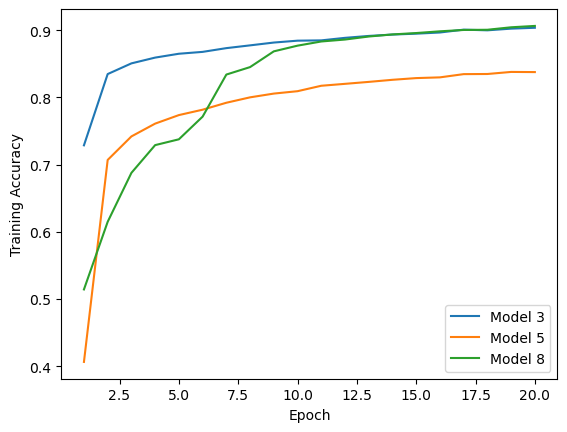

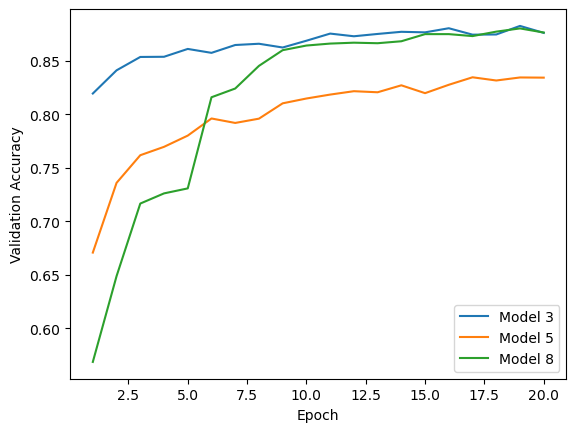

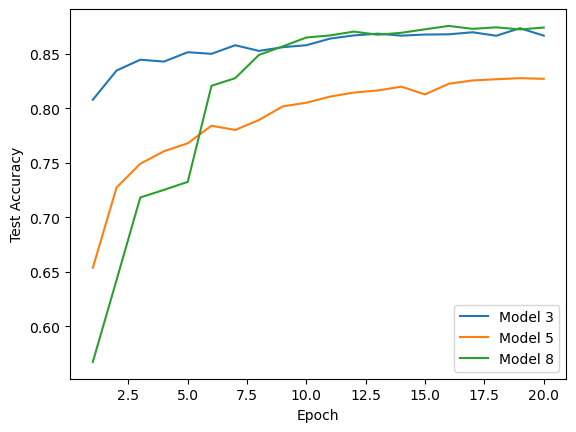

In [14]:
#plot training accuracies for model 3,5,8
epochaxis=np.arange(1,epochs+1)
plt.plot(epochaxis,traincorrectList3,label='Model 3')
plt.plot(epochaxis,traincorrectList5,label='Model 5')
plt.plot(epochaxis,traincorrectList9,label='Model 8')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend()
plt.show()

#plot validation accuracies for model 3,5,8
plt.plot(epochaxis,valcorrectList3,label='Model 3')
plt.plot(epochaxis,valcorrectList5,label='Model 5')
plt.plot(epochaxis,valcorrectList9,label='Model 8')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

#plot test accuracies for model 3,5,8
plt.plot(epochaxis,testcorrectList3,label='Model 3')
plt.plot(epochaxis,testcorrectList5,label='Model 5')
plt.plot(epochaxis,testcorrectList9,label='Model 8')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.legend()
plt.show()






**2.3b** Describe at least **two** observations of the data plotted in this section.

In [15]:
# Write your answer here

## 3. Denoising Autoencoder [16 marks]

### The CIFAR-10 dataset
In this assignment, we will work on the CIFAR-10 dataset collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton from the University of Toronto. This dataset consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. Each sample is a 3-channel colour images of 32x32 pixels in size. There are 50,000 training images and 10,000 test images.

### 3.1: Data loading and manipulation [3 marks]

**3.1a** Download both the training and test data of the CIFAR-10 dataset, e.g., by following the pytorch CIFAR10 tutorial. You can also download via other ways if you prefer.

In [16]:
# Write your code here.
#from cifar tutorial
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


**3.1b** Add random noise to all training and test data to generate noisy dataset, e.g., by torch.randn(), with a scaling factor scale, e.g., original image + scale * torch.randn(), and normalise/standardise the pixel values to the original range, e.g., using np.clip(). You may choose any scale value between 0.2 and 0.5.

A random transformation can be applied using a `Lambda` [transform](https://pytorch.org/vision/stable/transforms.html) when composing the load data transform, which looks a little like this:  
`transforms.Lambda(lambda x: x + ..... )`

Note: Before generating the random noise, you MUST set the random seed to your UCard number XXXXXXXXX for reproducibility, e.g., using torch.manual_seed(). This seed needs to be used for all remaining code if there is randomness, for reproducibility.

You may want to create separate dataloaders for the noisy and clear images but make sure they are not shuffling the data so that correct pair of images are being given as input and desired output.

In [17]:
# Write your code here.
#add random noise to the images
torch.manual_seed(2713141)
#create custom transformation for adding noise using torch.randn
#
def AddNoise(dataset):
    noiseData=[]
    for data in dataset:
        inputs,labels=data
        #generate noise with torch.randn and add it to original image
        noise = torch.randn(inputs.size())*0.35
        inputs=inputs+noise
        #standardize the pixel to original range using np.clip
        inputs=np.clip(inputs,-1,1)
        noiseData.append((inputs,labels))
    return noiseData


transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),

])
noisy_trainset = AddNoise(trainset)
noisy_testset = AddNoise(testset)
noisy_trainloader = torch.utils.data.DataLoader(noisy_trainset, batch_size=batch_size, shuffle=True, num_workers=2)
noisy_testloader = torch.utils.data.DataLoader(noisy_testset, batch_size=batch_size, shuffle=False, num_workers=2)




**3.1c** Show 20 pairs of original and noisy images.

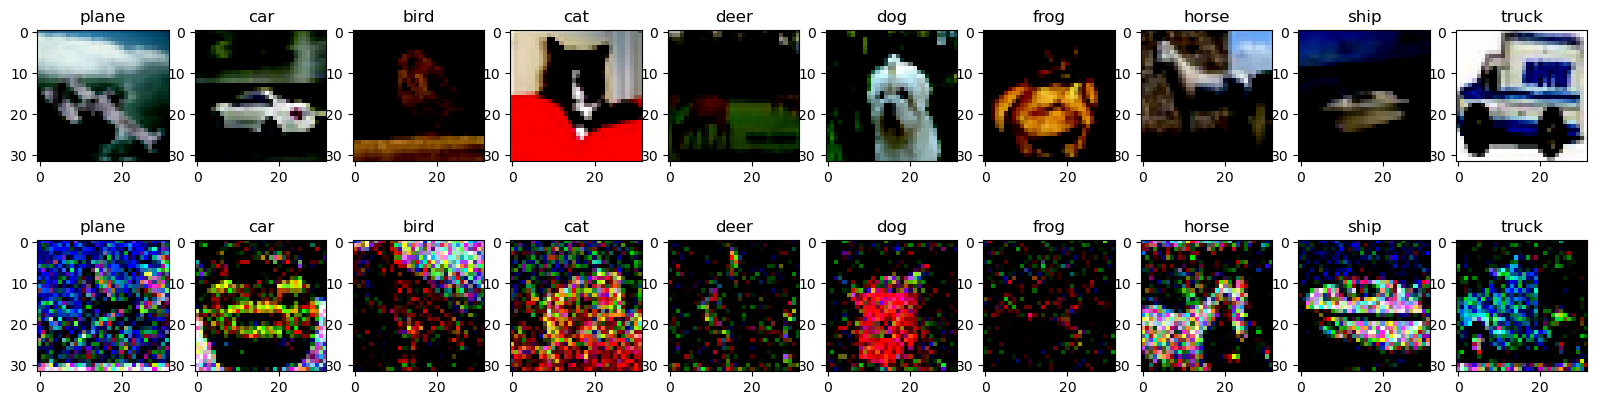

In [18]:
# Write your code here.
#show 20 pairs of noisy and clean images
classesCIFAR = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')
fig,ax=plt.subplots(2,10,figsize=(20,5))#prepare a 2x10 grid for plotting


for i in range(10): 
    index=0
    #print an image from the first class in trainset
    for data in trainloader:
        if index>1:
            break
        images,labels=data
        images=np.clip(images,0,1)
        for j in range(len(labels)):# this loop loops through labels and
            
            if labels[j]==i:
                
                ax[0,i].imshow(images[j].numpy().transpose(1,2,0).squeeze(),cmap='gray_r')
                ax[0,i].set_title(classesCIFAR[labels[j]])
                index+=1
                if index>0:
                    break
        if index>0:
            break
    indexnoisy=0
    for data in noisy_trainloader:
        if indexnoisy>1:
            break
        images,labels=data
        images=np.clip(images,0,1)
        for j in range(len(labels)):
            if labels[j]==i:
                ax[1,i].imshow(images[j].numpy().transpose(1,2,0).squeeze(),cmap='gray_r')
                ax[1,i].set_title(classesCIFAR[labels[j]])
                indexnoisy+=1
                if indexnoisy>0:
                    break
        if indexnoisy>0:
            break
plt.show()




### 3.2 Applying a Denoising Autoencoder to the modified CIFAR10 [10 marks]

This question uses both the original and noisy CIFAR-10 datasets (all 10 classes).
Read about denoising autoencoders at [Wikipedia](https://en.wikipedia.org/wiki/Autoencoder) and this [short introduction](https://towardsdatascience.com/denoising-autoencoders-explained-dbb82467fc2) or any other sources you like.

**3.2a** Modify the autoencoder architecture in Lab 7 so that it takes colour images as input (i.e., 3 input channels).

In [19]:
# class Autoencoder(nn.Module):
#     def __init__(self):
#         super(Autoencoder,self).__init__()
#         self.encoder=nn.Sequential(
#             nn.Conv2d(3,16,3,stride= 2,padding=1), #input is 3 x 32 x 32, output is 16 x 32 x 32
#             nn.ReLU(),
#             nn.Conv2d(16,8,3,stride = 2, padding=1),# input is 16x16x16, output is 8x16x16
#             nn.ReLU(),
#             nn.Conv2d(8,8,3,padding=1), #input is 8x8x8, output is 8x8x8
#             nn.ReLU()
#         )
#         self.decoder=nn.Sequential(
#             nn.ConvTranspose2d(8,8,3,padding=1), #input is 8x8x8, output is 8x8x8
#             nn.ReLU(),
#             nn.ConvTranspose2d(8,16,3,stride=2,padding=1,output_padding=1), #input is 8x8x8, output is 16x16x16
#             nn.ReLU(),
#             nn.ConvTranspose2d(16,3,3,stride=2,padding=1,output_padding=1), #input is 16x16x16, output is 3x32x32
#             nn.Tanh()
#         )
#     def forward(self,x):
#         x=self.encoder(x)
#         x=self.decoder(x)
#         return x
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder=nn.Sequential(
            nn.Conv2d(3,16,3,stride= 2,padding=1), 
            nn.ReLU(),
            nn.Conv2d(16,32,3,stride = 2, padding=1),# 
            nn.ReLU(),
            nn.Conv2d(32,64,3,stride = 2, padding=1),# 
        )
        self.decoder=nn.Sequential(
            nn.ConvTranspose2d(64,32,3,stride=2,padding=1,output_padding=1), 
            nn.ReLU(),
            nn.ConvTranspose2d(32,16,3,stride=2,padding=1,output_padding=1), 
            nn.ReLU(),
            nn.ConvTranspose2d(16,3,3,stride=2,padding=1,output_padding=1), 
            nn.Sigmoid()
        )
    def forward(self,x):
        x=self.encoder(x)
        x=self.decoder(x)
        return x


**3.2b** Training: feed the noisy training images as input to the autoencoder defined above; use a loss function that computes the reconstruction error between the output of the autoencoder and the respective original images.



In [29]:
def train_AE(model, dataset, max_epochs=20, print_steps=5):
    #Training (optimisation) parameters
    batch_size=64
    learning_rate=1e-3

    #Choose mean square error loss
    criterion = nn.MSELoss() 

    #Choose the Adam optimiser
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

    #Specify how the data will be loaded in batches (with random shuffling)
    train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    #Storage
    outputs = []

    #Start training
    for epoch in range(max_epochs):
        for img, label in train_loader:
            recon = model(img)
            loss = criterion(recon, img) # MSE loss between the input and the reconstruction

            loss.backward()
            optimizer.step()  
            optimizer.zero_grad()
          
        if ((epoch % print_steps) == 0) or (epoch +1 == max_epochs):
            print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, loss.item()))
        outputs.append((epoch, img.detach(), recon.detach(), loss.item()))

    return outputs
myAE=Autoencoder()
outputs = train_AE(myAE, noisy_trainset, max_epochs=20, print_steps=5)

Epoch:1, Loss:0.1026
Epoch:6, Loss:0.0780
Epoch:11, Loss:0.0712
Epoch:16, Loss:0.0703
Epoch:20, Loss:0.0735


**3.2c** Testing: evaluate the autoencoder trained in 3.2b on the test datasets (feed noisy images in and compute reconstruction errors on original clean images. Find the worst denoised 30 images (those with the largest reconstruction errors) in the test set and show them in pairs with the original images (60 images to show in total).

[9, 5, 7]
20
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10


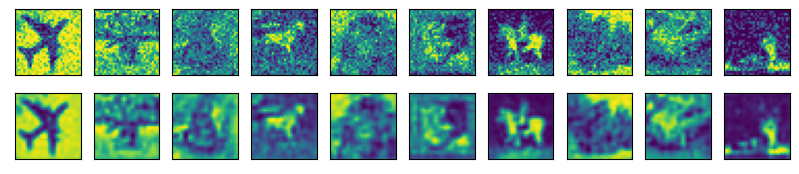

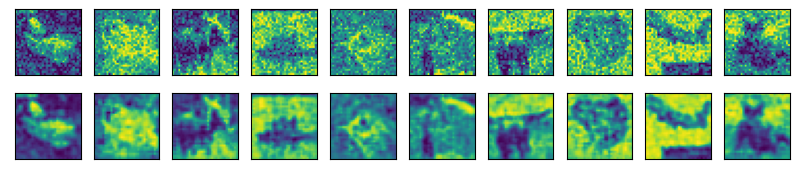

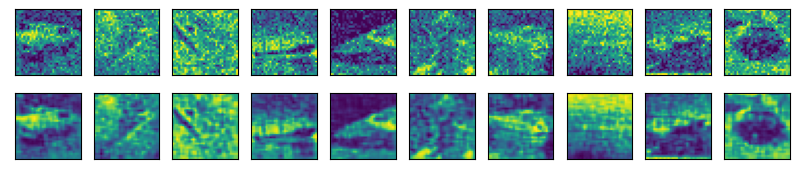

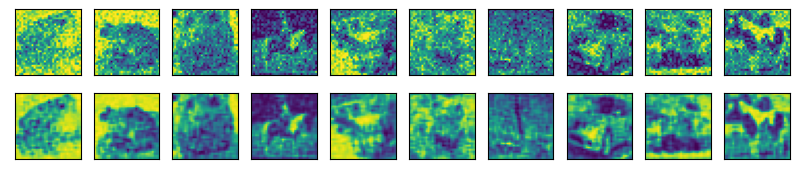

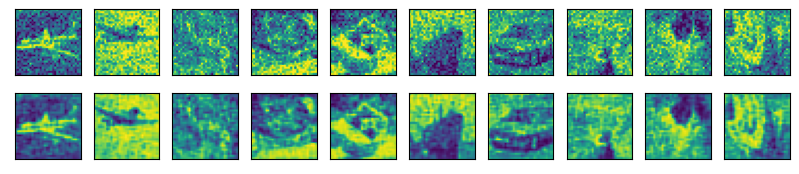

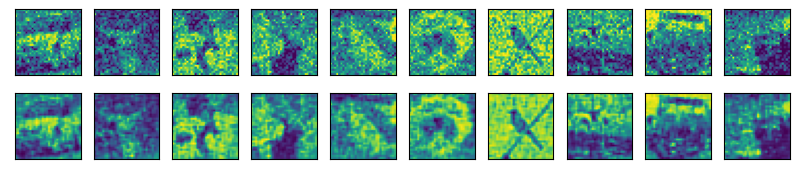

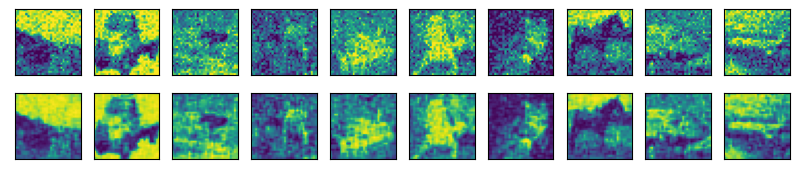

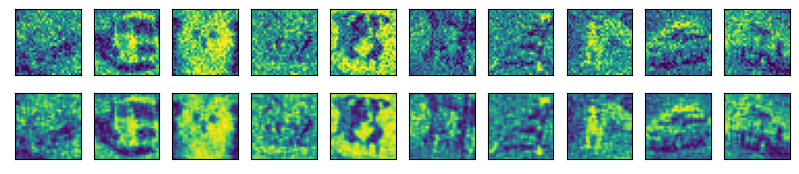

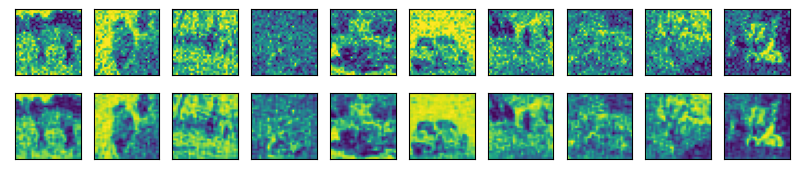

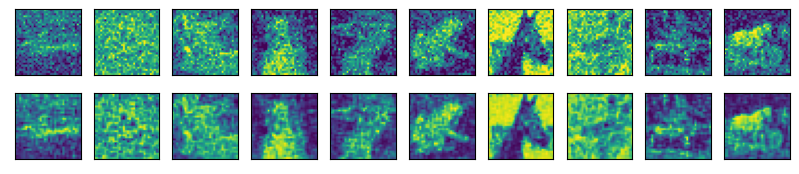

In [35]:
# Write your code here.
#evaluate model on test set

#function to find the indices of the x highest values in a list
def find_max_indices(list, x):
    return sorted(range(len(list)), key=lambda i: list[i])[-x:]




numImgs=10;
print(len(outputs))

for k in range(0, 10):
    plt.figure(figsize=(numImgs, 2))
    imgs = outputs[k][1].numpy()    
    recon = outputs[k][2].numpy()
    #losses=outputs[k][3]

    print('Epoch:', k+1)
    for i, item in enumerate(imgs):
        
        if i >= numImgs: break
        plt.subplot(2, numImgs, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(item[0])
        
    for i, item in enumerate(recon):
        if i >= numImgs: break
        plt.subplot(2, numImgs, numImgs+i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(item[0])

#function to return the indices of the 30 worst reconstructions
def worstReconstructions(recon, numRecon):
    #recon is a list of reconstructions
    #numRecon is the number of reconstructions to return
    #returns a list of the indices of the worst reconstructions
    #write your code here
    reconLoss=[]
    for i in range(len(recon)):
        reconLoss.append(torch.mean((recon[i][1]-recon[i][2])**2))
    reconLoss=np.array(reconLoss)
    return np.argsort(reconLoss)[-numRecon:]


**3.2d** Choose at least **two** hyperparameters (e.g learning rate) to vary. Study at least **three** different choices for each hyperparameter. When varying one hyperparameter, all the other hyperparameters can be fixed. **Plot** the reconstruction error with respect to each of these hyper-parameters.

In [23]:
# Write your code here.

### 3.3 Discussion of results [3 marks]
**3.3a** Describe at least **two** interesting relevant observations from the evaluation results above.

In [24]:
# Write your answer here.